In [47]:
# Simulating task data for "Take Medication" and "Pay Bills" over several days
# data = {
#     'Task': ['Take Medication'] * 14 + ['Pay Bills'] * 14,
#     'Frequency': [7] * 14 + [1] * 14,  # 7 times per week for Medication, 1 time per week for Bills
#     'Priority': [10] * 14 + [8] * 14,  # Higher priority for Medication
#     'CompletionRate': [0.6, 0.8, 0.4, 0.5, 0.7, 0.6, 0.4, 0.9, 0.5, 0.3, 0.6, 0.5, 0.8, 0.6, # Medication data
#                        0.9, 0.8, 0.7, 0.6, 0.8, 0.9, 0.7, 0.6, 0.5, 0.9, 0.8, 0.8, 0.9, 0.7]  # Bills data
# }

# df = pd.DataFrame(data)
# df
# df.to_csv('Tasks.csv')

In [48]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

a='Tasks.csv'
b='RandomPerson.csv'
c='Person_Who_Forgets_High_Priority_ones.csv'
d='Person_Who_Does_Not_Forgets_High_Priority_ones.csv'
e="Person_Who_Doesn't_Forget_Weekly_Tasks_but_Forgets_Daily_Tasks.csv"

csv_to_read = c

df = pd.read_csv(csv_to_read)


"""I used this prompt used to generate datasets in ChatGPT
give me a dataset that has the features such as Task, Frequency(7 times per week for Medication, 1 time per week for Bills), Priority level(values between 1 and 10, and completion rate. Include only 4 unique tasks. And the dataset is collect after few weeks of recording about these tasks. Give for a person that forgets stuff for high priority ones
"""

'I used this prompt used to generate datasets in ChatGPT\ngive me a dataset that has the features such as Task, Frequency(7 times per week for Medication, 1 time per week for Bills), Priority level(values between 1 and 10, and completion rate. Include only 4 unique tasks. And the dataset is collect after few weeks of recording about these tasks. Give for a person that forgets stuff for high priority ones\n'


Cluster -1:
        Task  Frequency  Priority  CompletionRate
3  Pay Bills          1         9             0.3
4  Pay Bills          1         9             0.2
5  Pay Bills          1         9             0.5

Cluster 0:
              Task  Frequency  Priority  CompletionRate
0  Take Medication          7        10            0.70
1  Take Medication          7        10            0.60
2  Take Medication          7        10            0.65

Cluster 1:
               Task  Frequency  Priority  CompletionRate
6  Grocery Shopping          3         5            0.90
7  Grocery Shopping          3         5            0.80
8  Grocery Shopping          3         5            0.95

Cluster 2:
        Task  Frequency  Priority  CompletionRate
9   Exercise          4         4            0.85
10  Exercise          4         4            0.75
11  Exercise          4         4            0.80


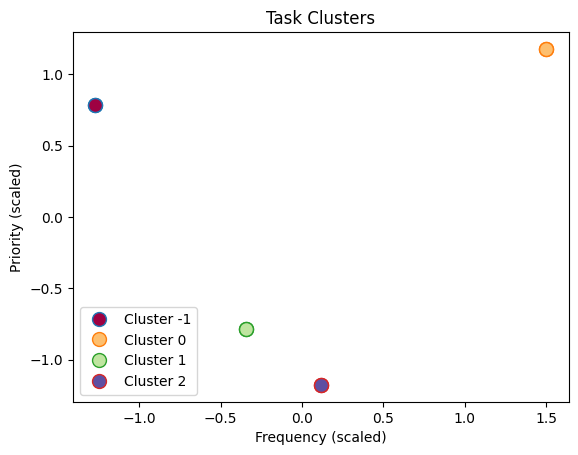


Cluster -1 - Tasks in this group are set for a high-priority daily reminder.
  - Pay Bills: high-priority daily reminder

Cluster 0 - Tasks in this group are set for a high-priority daily reminder.
  - Take Medication: high-priority daily reminder

Cluster 1 - Tasks in this group are set for a weekly reminder.
  - Grocery Shopping: weekly reminder

Cluster 2 - Tasks in this group are set for a weekly reminder.
  - Exercise: weekly reminder


In [49]:
# Select features for clustering: Frequency, Priority, and CompletionRate
X = df[['Frequency', 'Priority', 'CompletionRate']].values
stscaler = StandardScaler().fit(X)
X_scaled = stscaler.transform(X)

# Applying DBSCAN clustering
dbsc = DBSCAN(eps=0.5, min_samples=3).fit(X_scaled)
labels = dbsc.labels_

# Adding cluster labels back to the dataframe
df['Cluster'] = labels
unique_labels = np.unique(labels)

# Print clustered tasks with completion info
for label in unique_labels:
    cluster_data = df[df['Cluster'] == label]
    print(f"\nCluster {label}:")
    print(cluster_data[['Task', 'Frequency', 'Priority', 'CompletionRate']])
    
# Visualize clusters
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    plt.plot(X_scaled[class_member_mask, 0], X_scaled[class_member_mask, 1], 'o',
             markerfacecolor=color, markersize=10, label=f'Cluster {label}')
    plt.legend()
plt.xlabel('Frequency (scaled)')
plt.ylabel('Priority (scaled)')
plt.title('Task Clusters')
plt.show()

# Reminder logic based on clusters
for label in unique_labels:
    cluster_data = df[df['Cluster'] == label]
    avg_completion = cluster_data['CompletionRate'].mean()
    avg_priority = cluster_data['Priority'].mean()

    # Determine reminder frequency and type based on average completion rate and priority in cluster
    if avg_priority >= 9 and avg_completion < 0.7:
        reminder_type = "high-priority daily reminder"
    elif avg_priority >= 7 and avg_completion < 0.8:
        reminder_type = "frequent reminder every other day"
    else:
        reminder_type = "weekly reminder"
    
    print(f"\nCluster {label} - Tasks in this group are set for a {reminder_type}.")
    for task in cluster_data['Task'].unique():
        print(f"  - {task}: {reminder_type}")


In [50]:
dict2 = dict()
for i in df['Task'].unique():
    # print(i)
    dict2[i] = dict()
print(dict2)
for i in df['Task'].unique():
    # print(dict2[i])
    for l in unique_labels:
        list_for_label = 0
        dict2[i][l] = list_for_label
print(dict2)
for row_in_dataset in df.values:
    task_is = row_in_dataset[0]
    label_is = row_in_dataset[4]
    # print(task_is, "-",label_is)
    for med_kinda in dict2:
        for minus_one_kinda in dict2[med_kinda]: #Accessing the dict of label-count pairs
            if label_is == minus_one_kinda and task_is == med_kinda:
                dict2[med_kinda][minus_one_kinda] = dict2[med_kinda][minus_one_kinda] + 1
print(dict2)

{'Take Medication': {}, 'Pay Bills': {}, 'Grocery Shopping': {}, 'Exercise': {}}
{'Take Medication': {-1: 0, 0: 0, 1: 0, 2: 0}, 'Pay Bills': {-1: 0, 0: 0, 1: 0, 2: 0}, 'Grocery Shopping': {-1: 0, 0: 0, 1: 0, 2: 0}, 'Exercise': {-1: 0, 0: 0, 1: 0, 2: 0}}
{'Take Medication': {-1: 0, 0: 3, 1: 0, 2: 0}, 'Pay Bills': {-1: 3, 0: 0, 1: 0, 2: 0}, 'Grocery Shopping': {-1: 0, 0: 0, 1: 3, 2: 0}, 'Exercise': {-1: 0, 0: 0, 1: 0, 2: 3}}


In [51]:
best_clusters = []
for i in dict2:
    l = dict2[i]
    max = 0
    best_cluster = ""
    for j in l:
        if l[j] > max:
            max = l[j]
            best_cluster = j
    best_clusters.append((i,best_cluster))
    print(i,":\t", best_cluster)
        

Take Medication :	 0
Pay Bills :	 -1
Grocery Shopping :	 1
Exercise :	 2


In [52]:
labels_of_best_clusters = []
for i in best_clusters:
    labels_of_best_clusters.append(i[1])
labels_of_best_clusters

[0, -1, 1, 2]

In [53]:
reminder_types = []
for label in labels_of_best_clusters:
    cluster_data = df[df['Cluster'] == label]
    avg_completion = cluster_data['CompletionRate'].mean()
    avg_priority = cluster_data['Priority'].mean()

    # Determine reminder frequency and type based on average completion rate and priority in cluster
    if avg_priority >= 9 and avg_completion < 0.7:
        reminder_type = "high-priority daily reminder"
    elif avg_priority >= 7 and avg_completion < 0.8:
        reminder_type = "frequent reminder every other day"
    else:
        reminder_type = "weekly reminder"
    reminder_types.append(reminder_type)
reminder_types

['high-priority daily reminder',
 'high-priority daily reminder',
 'weekly reminder',
 'weekly reminder']

In [54]:
print("This is about a: ", csv_to_read)
print()
print("As per the current behavious pattern, the reminder patterns for each unique task is,")
for i,j in zip(best_clusters, reminder_types):
    print(i[0], ":", j)
print()
print("The collected dataset is, ")
df

This is about a:  Person_Who_Forgets_High_Priority_ones.csv

As per the current behavious pattern, the reminder patterns for each unique task is,
Take Medication : high-priority daily reminder
Pay Bills : high-priority daily reminder
Grocery Shopping : weekly reminder
Exercise : weekly reminder

The collected dataset is, 


,Task,Frequency,Priority,CompletionRate,Cluster
0,Take Medication,7,10,0.70,0
1,Take Medication,7,10,0.60,0
2,Take Medication,7,10,0.65,0
3,Pay Bills,1,9,0.30,-1
4,Pay Bills,1,9,0.20,-1
5,Pay Bills,1,9,0.50,-1
6,Grocery Shopping,3,5,0.90,1
7,Grocery Shopping,3,5,0.80,1
8,Grocery Shopping,3,5,0.95,1
9,Exercise,4,4,0.85,2
